In [1]:
import pandas as pd 
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline
sns.set_style("white")

base_dir = os.path.dirname(os.getcwd())

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
sns.set_style(style='ticks')

# Study 1

In [2]:
data_turn_taking = pd.read_csv(os.path.join(base_dir,'Analyses','turn_taking_strangers.csv'))
data_connection = pd.read_csv(os.path.join(base_dir,'Analyses','connection_strangers.csv'))
data_outcomes = pd.read_csv(os.path.join(base_dir,'Analyses','post_convo_survey_with_factors_strangers.csv'))

data_interim = pd.merge(data_turn_taking, data_outcomes, how='inner', on=['subID', 'partnerID'])
data = pd.merge(data_interim, data_connection, how='inner', on=['subID', 'partnerID'])

# center features within subject
# mimics the random effect structure used in regression

features = ['mean_gap_convo', 'factor_1', 'avg_connection']
for feature in features:
    store_mean = data.groupby('subID')[feature].mean()
    new_feature = feature + '_centered'
    for i in range(len(data)):  
        sub = int(data.at[i,'subID'])
        data.at[i, new_feature] = data.at[i, feature] - store_mean[sub]

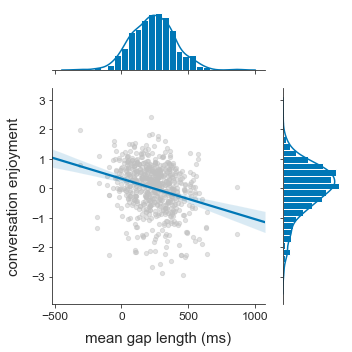

In [3]:
fig = sns.jointplot("mean_gap_convo", "factor_1_centered", data=data, kind="reg",
                    color='#0077b6',
                    space=0, height=5, ratio=3,
             scatter_kws={"color":"silver","alpha":0.45,"s":18},
                   marginal_kws={'hist_kws': {'alpha': 1}})
fig.set_axis_labels('mean gap length (ms)', 'conversation enjoyment',
                   fontsize=15, labelpad=10)

ax = fig.ax_joint
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Figures','figure_2A.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_2A.pdf'), dpi=300)

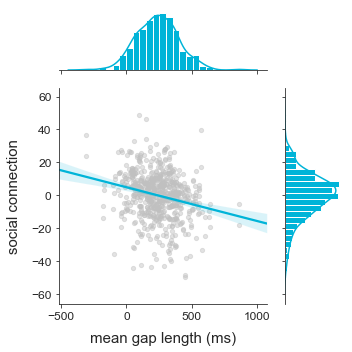

In [4]:
fig = sns.jointplot("mean_gap_convo", "avg_connection_centered", data=data, kind="reg",
                    color='#00b4d8',
                    space=0, height=5, ratio=3,
             scatter_kws={"color":"silver","alpha":0.45,"s":18},
                   marginal_kws={'hist_kws': {'alpha': 1}})
fig.set_axis_labels('mean gap length (ms)', 'social connection',
                   fontsize=15, labelpad=10)

ax = fig.ax_joint
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Figures','figure_2B.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_2B.pdf'), dpi=300)

# Study 3

In [5]:
data_full = pd.read_csv(os.path.join(base_dir,'Data','manipulated_gaps.csv'))

# mean center within subject

features = ['enjoy', 'connected']
for feature in features:
    store_mean = data_full.groupby('subID')[feature].mean()
    new_feature = feature + '_centered'
    for i in range(len(data_full)): 
        sub = int(data_full.at[i,'subID'])
        data_full.at[i, new_feature] = data_full.at[i, feature] - store_mean[sub]
        
data_full.to_csv(os.path.join(base_dir,'Analyses','manipulated_gaps_centered.csv'), encoding='utf-8', index=False)


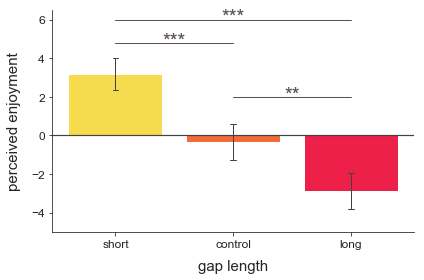

In [6]:
ax = sns.barplot(x="condition", y="enjoy_centered", data=data_full, errwidth=1,
                 capsize=0.05, order=['short','control','long'], 
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('gap length', fontsize=15, labelpad=10)
ax.set_ylabel('perceived enjoyment', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-5, 6.5))

ax.axhline(0, color='#424242', lw=1.2) 

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# short vs long
x1, x2 = 0, 2   
y = 6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 0, 1   
y = 4.8
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 1, 2   
y = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_3A.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_3A.pdf'), dpi=300)

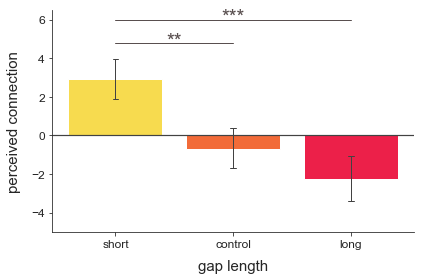

In [7]:
ax = sns.barplot(x="condition", y="connected_centered", data=data_full, errwidth=1,
                 capsize=0.05, order=['short','control','long'], 
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('gap length', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-5, 6.5))

ax.axhline(0, color='#424242', lw=1.2) 

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# short vs long
x1, x2 = 0, 2   
y = 6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 0, 1   
y = 4.8
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_3B.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_3B.pdf'), dpi=300)

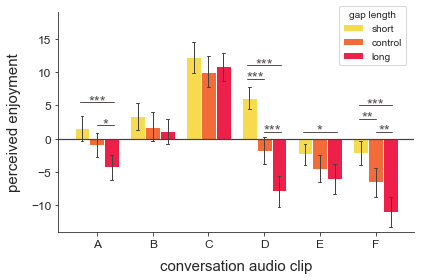

In [8]:
ax = sns.barplot(x="convo", y="enjoy_centered", hue="condition", data=data_full, errwidth=1,
                 capsize=.05, hue_order=['short','control','long'],
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('conversation audio clip', fontsize=15, labelpad=10)
ax.set_ylabel('perceived enjoyment', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-14, 19))

ax.legend(bbox_to_anchor=[0.99, 1.05], title="gap length")
ax.axhline(0, color='#424242', lw=1.2)

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.9
star_font_size = 15

## A
# short vs long
x1, x2 = -0.3, 0.3   
y = 5.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 0, 0.3   
y = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## D
# short vs control
x1, x2 = 2.7, 3   
y = 9
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs long
x1, x2 = 2.7, 3.3   
y = 11
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 3, 3.3   
y = 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## E
# short vs long
x1, x2 = 3.7, 4.3   
y = 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


## F
# short vs long
x1, x2 = 4.7, 5.3   
y = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 4.7, 5   
y = 3
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 5, 5.3   
y = 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


plt.savefig(os.path.join(base_dir,'Figures','figure_3C.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_3C.pdf'), dpi=300)

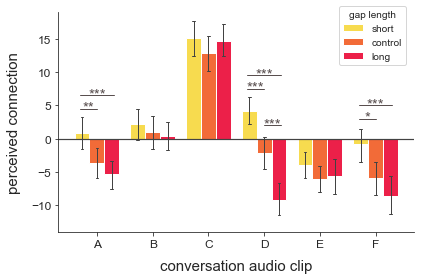

In [9]:
ax = sns.barplot(x="convo", y="connected_centered", hue="condition", data=data_full, errwidth=1,
                 capsize=.05, hue_order=['short','control','long'],
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('conversation audio clip', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-14, 19))

ax.legend(bbox_to_anchor=[0.99, 1.05], title="gap length")
ax.axhline(0, color='#424242', lw=1.2)

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.9
star_font_size = 15

## A
# short vs long
x1, x2 = -0.3, 0.3   
y = 6.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = -0.3, 0   
y = 4.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## D
# short vs control
x1, x2 = 2.7, 3   
y = 7.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs long
x1, x2 = 2.7, 3.3   
y = 9.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 3, 3.3   
y = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## F
# short vs long
x1, x2 = 4.7, 5.3   
y = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 4.7, 5   
y = 3
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


plt.savefig(os.path.join(base_dir,'Figures','figure_3D.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_3D.pdf'), dpi=300)

# Study 4

Differences between friend and stranger conversations

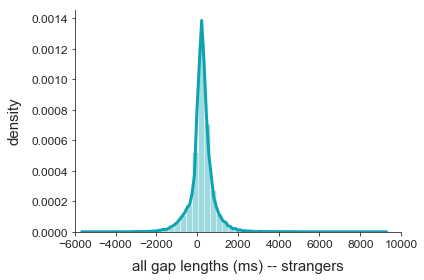

In [31]:
flist = glob.glob(os.path.join(base_dir, 'Analyses', 'turn_taking', 'strangers', '*.csv'))
data = pd.read_csv(flist[0])
all_latency_values_strangers = data['gap_length']

for file in flist[1:]:
    
    data = pd.read_csv(file)
    all_latency_values_strangers = all_latency_values_strangers.append(data['gap_length'])
    
ax = sns.distplot(all_latency_values_strangers, hist = True, kde = True,
             kde_kws = {'linewidth': 3}, color='#0FA3B1')
plt.xlim(-6000, 10000)

ax.set_xlabel('all gap lengths (ms) -- strangers', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','figure_4A_1.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_4A_1.pdf'), dpi=300)

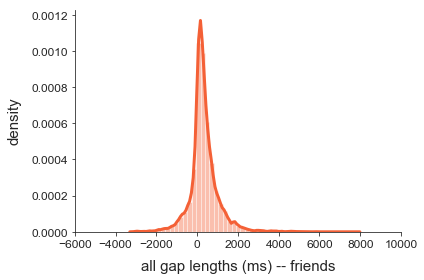

In [32]:
flist = glob.glob(os.path.join(base_dir, 'Analyses', 'turn_taking', 'friends', '*.csv'))
data = pd.read_csv(flist[0])
all_latency_values_friends = data['gap_length']

for file in flist[1:]:
    
    data = pd.read_csv(file)
    all_latency_values_friends = all_latency_values_friends.append(data['gap_length'])
    
ax = sns.distplot(all_latency_values_friends, hist = True, kde = True,
             kde_kws = {'linewidth': 3}, color='#F46036')
plt.xlim(-6000, 10000)

ax.set_xlabel('all gap lengths (ms) -- friends', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','figure_4A_2.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_4A_2.pdf'), dpi=300)

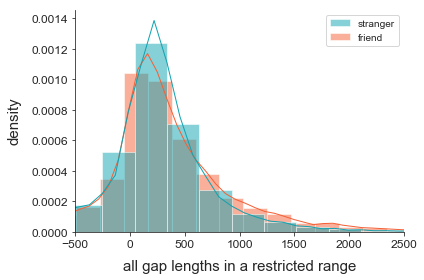

In [35]:
ax = sns.distplot(all_latency_values_friends, hist = True, kde = True,
             kde_kws = {'linewidth': 1}, color='#F46036', label = 'friend', hist_kws=dict(alpha=0.5))
ax = sns.distplot(all_latency_values_strangers, hist = True, kde = True,
             kde_kws = {'linewidth': 1}, color='#0FA3B1', label = 'stranger', hist_kws=dict(alpha=0.5))

plt.xlim(-500, 2500)

ax.set_xlabel('all gap lengths in a restricted range', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','figure_4B.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_4B.pdf'), dpi=300)

In [13]:
stranger_data = pd.read_csv(os.path.join(base_dir,'Analyses','turn_taking_strangers.csv'))
friend_data = pd.read_csv(os.path.join(base_dir, 'Analyses', 'turn_taking_friends.csv'))

stranger_data['condition'] = 'stranger'
friend_data['condition'] = 'friend'

data = pd.merge(stranger_data, friend_data, how='outer')

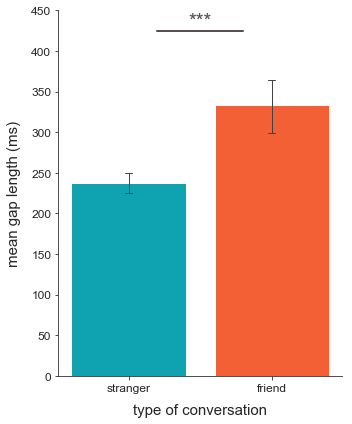

In [26]:
plt.figure(figsize=(5,6))

ax = sns.barplot(x="condition", y="mean_gap_convo", data=data, errwidth=1,
                 capsize=.05, 
                 palette=['#0FA3B1', '#F46036'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('mean gap length (ms)', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 450))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 425
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_4C.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_4C.pdf'), dpi=300)


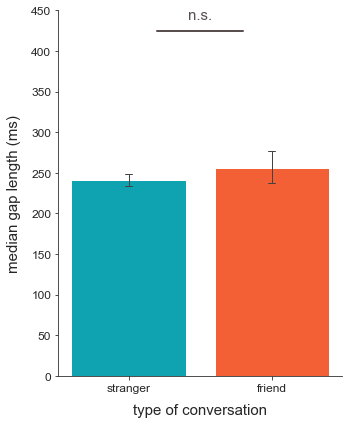

In [28]:
plt.figure(figsize=(5,6))

ax = sns.barplot(x="condition", y="median_gap_convo", data=data, errwidth=1,
                 capsize=.05, 
                 palette=['#0FA3B1', '#F46036'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('median gap length (ms)', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 450))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = 10
star_font_size = 15

# strangers vs friends
x1, x2 = .20, .80   
y = 425
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "n.s.", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_4D.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_4D.pdf'), dpi=300)

# Study 4

Rating task investigating long gaps

In [16]:
rating_data = pd.read_csv(os.path.join(base_dir,'Analyses','long_gap_ratings_wide_format.csv'))
rating_data['video_num'] = rating_data['video_num'].astype(int)
data_info = pd.read_csv(os.path.join(base_dir, 'Data', 'long_gap_stimuli_info.csv'))

data_full = pd.merge(data_info, rating_data, how='inner', on=['video_num'])


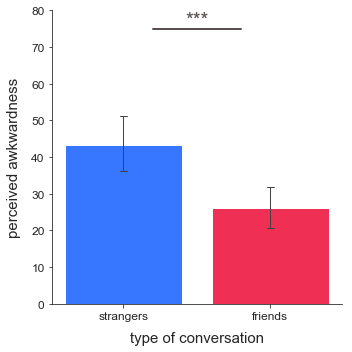

In [17]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x="condition", y="awkward_mean", data=data_full, errwidth=1,
                 capsize=.05, 
                 palette=['#3777FF', '#EF3054'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('perceived awkwardness', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 80))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 75
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_5A.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_5A.pdf'), dpi=300)


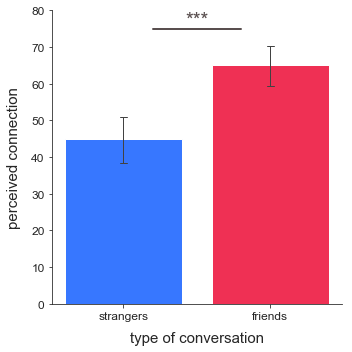

In [18]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x="condition", y="connected_mean", data=data_full, errwidth=1,
                 capsize=.05, 
                 palette=['#3777FF', '#EF3054'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 80))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 75
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_5B.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_5B.pdf'), dpi=300)

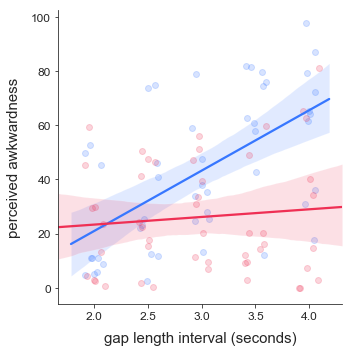

In [19]:
sns.lmplot(x="interval", y="awkward_mean", hue="condition", data=data_full,
          palette=['#3777FF', '#EF3054'], x_jitter=.1, y_jitter=None,
          scatter_kws={'alpha':0.2}, legend=False)

plt.xlabel("gap length interval (seconds)", fontsize=15, labelpad=10)
plt.ylabel("perceived awkwardness", fontsize=15, labelpad=10)
plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','figure_5C.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_5C.pdf'), dpi=300)

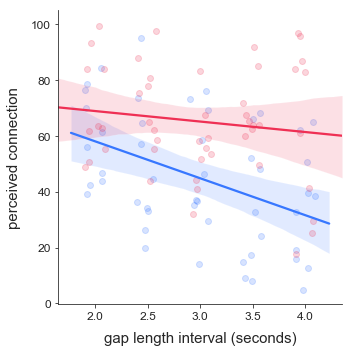

In [20]:
sns.lmplot(x="interval", y="connected_mean", hue="condition", data=data_full,
          palette=['#3777FF', '#EF3054'], x_jitter=.1, y_jitter=None,
          scatter_kws={'alpha':0.2}, legend=False)

plt.xlabel("gap length interval (seconds)", fontsize=15, labelpad=10)
plt.ylabel("perceived connection", fontsize=15, labelpad=10)
plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','figure_5D.png'), dpi=300)
plt.savefig(os.path.join(base_dir,'Figures','figure_5D.pdf'), dpi=300)